In [4]:
import socket

host = "localhost"
port = 5432

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
result = sock.connect_ex((host, port))
if result == 0:
    print(f"Connection to {host}:{port} successful!")
else:
    print(f"Failed to connect to {host}:{port}")
sock.close()



Connection to localhost:5432 successful!


In [37]:


import pandas as pd 
from sqlalchemy import create_engine

DB_HOST="localhost"  
DB_PORT="5432"
DB_NAME="otodom"
DB_USER="postgres"
DB_PASSWORD="postgres"

engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

df = pd.read_sql("SELECT * FROM listings", engine)
df.head()


,id,price,district,rooms,area,seller_type
0,1,1199000.0,Grunwald,3.0,63.54,Oferta prywatna
1,2,405000.0,Stare Miasto,2.0,30.00,Oferta prywatna
2,3,679000.0,Stare Miasto,4.0,64.90,Oferta prywatna
3,4,425000.0,Stare Miasto,1.0,29.20,Biuro nieruchomości
4,5,650000.0,Stare Miasto,3.0,53.00,Oferta prywatna


## Clean and preview data. Key initial insights

In [49]:
df.isnull().sum()
df.info()
df.describe()
df.head()

df_clean = df.dropna(subset=['rooms', 'area'])
df_clean = df_clean[(df_clean['rooms'] > 0) & (df_clean['area'] > 0)]

df_clean["price_per_sqm"] = (df_clean["price"] / df_clean["area"]).round(2)
df_clean.head()

avg_apartamet_size = df_clean['area'].mean().round(2)
print(f"Average apartment size: {avg_apartamet_size} sqm")
median_apartamet_size = df_clean['area'].median().round(2)
print(f"Median apartment size: {median_apartamet_size} sqm")
avg_price_per_sqm = df_clean['price_per_sqm'].mean().round(2)
print(f"Average price per square meter: {avg_price_per_sqm} PLN/sqm")
median_price_per_sqm = df_clean['price_per_sqm'].median().round(2)
print(f"Median price per square meter: {median_price_per_sqm} PLN/sqm")
avg_rooms = df_clean['rooms'].mean().round(2)
median_rooms = df_clean['rooms'].median().round(2)
print(f"Average rooms: {avg_rooms}, Median rooms: {median_rooms}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           900 non-null    int64  
 1   price        722 non-null    float64
 2   district     900 non-null    object 
 3   rooms        898 non-null    float64
 4   area         898 non-null    float64
 5   seller_type  695 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 42.3+ KB
Average apartment size: 55.14 sqm
Median apartment size: 52.1 sqm
Average price per square meter: 12195.18 PLN/sqm
Median price per square meter: 12236.84 PLN/sqm
Average rooms: 2.45, Median rooms: 2.0


## Understanding data

# Number of observations:

This dataset contains 900 apartment listings with information on id, price, district, rooms, area, and seller_type. Some columns have missing values: price (722 non-null), rooms (898 non-null), area (898 non-null), and seller_type (695 non-null).

# Variable types:

id         : int64  
price      : float64
district   : object 
rooms      :float64
area       :float64
seller_type:object 

# Missing values:

Most missing values are in: price (178) and seller type (305).

# Key summary statistics:

- Apartment size: The average area is 55.14 sqm, with a median of 52.1 sqm, indicating most apartments are moderately sized.
- Price per square meter: Average is 12,195.18 PLN/sqm, and the median is 12,236.84 PLN/sqm, showing a fairly consistent pricing trend per sqm.
- Number of rooms: The average is 2.45 rooms, with a median of 2 rooms, suggesting most apartments have 2–3 rooms.

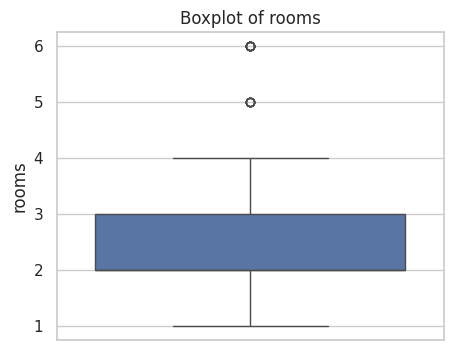

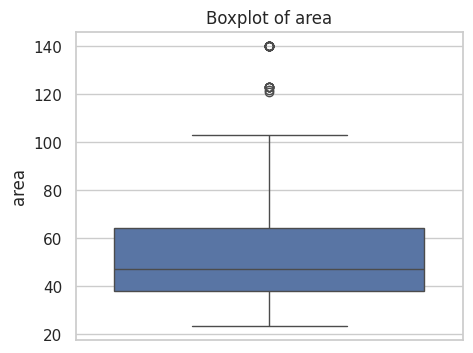

,id,price,rooms,area,price_per_sqm
count,722.000000,7.220000e+02,722.000000,722.000000,722.000000
mean,452.806094,6.207081e+05,2.465374,52.960665,12195.177078
std,260.899657,2.519007e+05,1.023737,23.599464,2560.228752
min,1.000000,3.031000e+05,1.000000,23.500000,6883.900000
25%,227.250000,4.501120e+05,2.000000,38.000000,10590.980000
50%,452.000000,5.699000e+05,2.000000,47.200000,12236.840000
75%,680.750000,7.190000e+05,3.000000,64.000000,13259.760000
max,900.000000,1.750000e+06,6.000000,140.190000,26919.970000


In [ ]:
# Boxplots for numeric columns to identify outliers

import matplotlib.pyplot as plt
import seaborn as sns

df_clean = df_clean[df_clean['price_per_sqm'].notna() & df_clean['price_per_sqm'].apply(lambda x: x != float('inf'))]

sns.set(style="whitegrid")
numeric_cols = ['rooms', 'area']

for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



## Are there outliers?

There appear to be some outliers in both area and rooms, but the number of listings with apartament areas that are significantly bigger than average is grater and could affect the analysis. 

## Visualization
- Price per Square Meter Distribution distribution 
- Price vs Area scatter plot
- Area distribution
- Room distribution

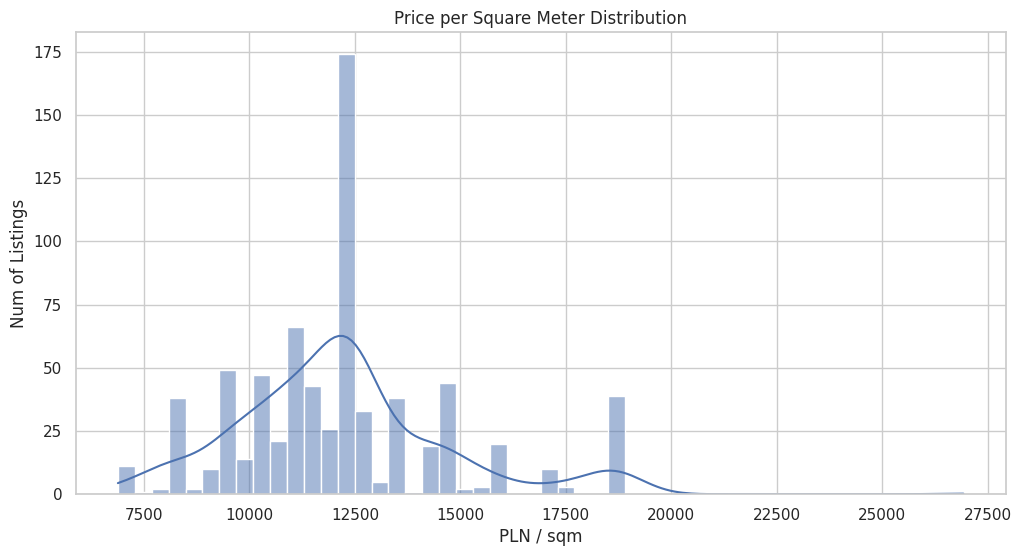

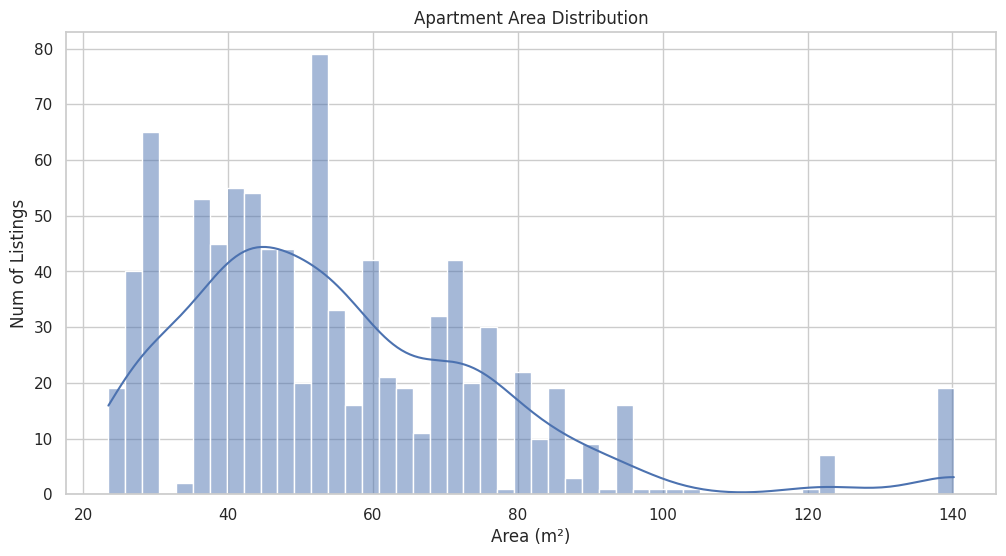

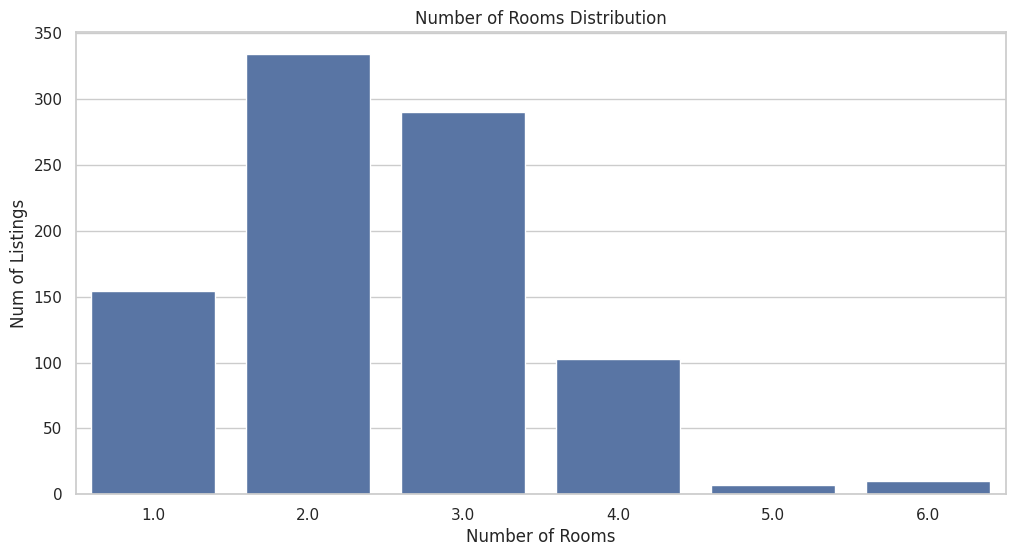

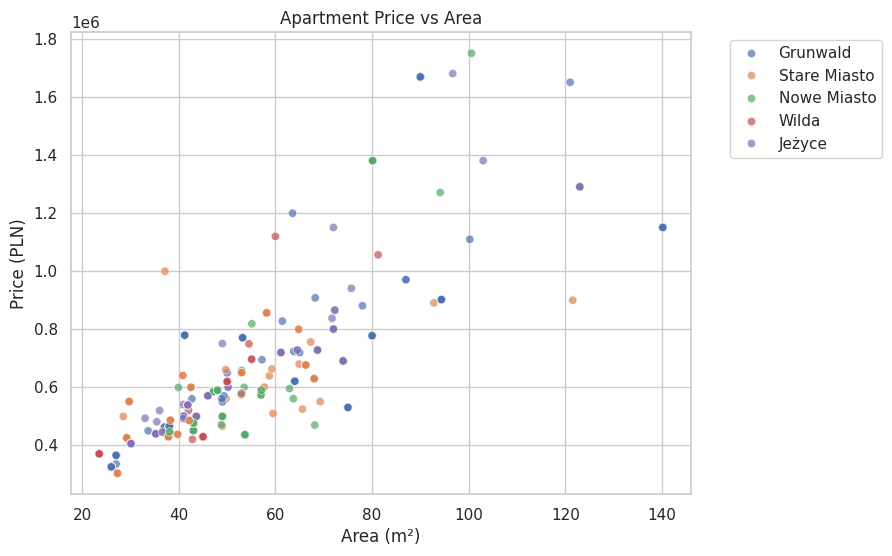

In [50]:
## Visualizations
# Price per square meter distribution


plt.figure(figsize=(12, 6))
sns.histplot(df_clean['price_per_sqm'], bins=50, kde=True)
plt.title('Price per Square Meter Distribution')
plt.xlabel('PLN / sqm')
plt.ylabel('Num of Listings')
plt.show()

# Area distribution

plt.figure(figsize=(12, 6))
sns.histplot(df_clean['area'], bins=50, kde=True)
plt.title('Apartment Area Distribution')
plt.xlabel('Area (m²)')
plt.ylabel('Num of Listings')
plt.show()

# Rooms distribution

plt.figure(figsize=(12, 6))         
sns.countplot(x='rooms', data=df_clean)
plt.title('Number of Rooms Distribution')
plt.xlabel('Number of Rooms')
plt.ylabel('Num of Listings')
plt.show()

# Price vs Area scatter plot    

plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df_clean, hue='district', alpha=0.7)
plt.title('Apartment Price vs Area')
plt.xlabel('Area (m²)')
plt.ylabel('Price (PLN)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Apartament area and rooms clearly do not have a normal distribution, I will test other variables with Shapiro-Wilk 

In [41]:
from scipy.stats import shapiro

numeric_cols = df_clean.select_dtypes(include=['float64']).columns

results = []

for col in numeric_cols:
    stat, p = shapiro(df_clean[col])
    results.append({
        'Variable': col,
        'Statistic': round(stat, 4),
        'p-value': round(p, 4),
        'Normal?': '✅ Yes' if p > 0.05 else '❌ No'
    })

import pandas as pd
shapiro_df = pd.DataFrame(results)
print(shapiro_df)

        Variable  Statistic  p-value Normal?
0          price     0.8070      0.0    ❌ No
1          rooms     0.8872      0.0    ❌ No
2           area     0.8507      0.0    ❌ No
3  price_per_sqm     0.9351      0.0    ❌ No


# Elementary descriptive statistics for groups

In [42]:
# Elementary statistics 

from scipy.stats import skew, kurtosis


# by seller type

quant_cols = ['price', 'price_per_sqm', 'rooms', 'area']
seller_stats = {}

for col in quant_cols:
    grouped = df_clean.groupby('seller_type')[col]
    desc = grouped.agg(['count', 'median', 'std', 'min', 'max'])
    desc['q1'] = grouped.quantile(0.25)
    desc['q3'] = grouped.quantile(0.75)
    desc['iqr'] = desc['q3'] - desc['q1']
    desc['range'] = desc['max'] - desc['min']
    desc['skewness'] = grouped.apply(lambda x: skew(x, bias=False))
    desc['kurtosis'] = grouped.apply(lambda x: kurtosis(x, bias=False))
    desc = desc.round(2)
    seller_stats[col] = desc

seller_stats['price'], seller_stats['rooms'], seller_stats['area']
for col, table in seller_stats.items():
    print(f"\n=== {col.upper()} by Seller Type ===")
    display(table)


=== PRICE by Seller Type ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
seller_type,,,,,,,,,,,
Biuro nieruchomości,510,534010.0,211085.14,303100.0,1380000.0,450112.00,629000.00,178888.0,1076900.0,1.82,3.62
Deweloper,2,688229.5,310037.33,469000.0,907459.0,578614.75,797844.25,219229.5,438459.0,0.00,-2.00
Oferta prywatna,164,610000.0,267295.07,335000.0,1750000.0,416250.00,690000.00,273750.0,1415000.0,1.78,3.98



=== PRICE_PER_SQM by Seller Type ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
seller_type,,,,,,,,,,,
Biuro nieruchomości,510,11981.16,1930.12,7064.00,17228.46,10590.98,12452.74,1861.76,10164.46,-0.00,0.64
Deweloper,2,10091.95,4536.87,6883.90,13300.00,8487.92,11695.98,3208.05,6416.10,-0.00,-2.00
Oferta prywatna,164,12355.60,3170.10,7941.09,26919.97,10487.80,15744.68,5256.88,18978.88,0.86,0.99



=== ROOMS by Seller Type ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
seller_type,,,,,,,,,,,
Biuro nieruchomości,510,2.0,1.00,1.0,6.0,2.00,3.00,1.0,5.0,0.77,1.27
Deweloper,2,3.5,0.71,3.0,4.0,3.25,3.75,0.5,1.0,0.00,-2.00
Oferta prywatna,164,2.0,1.04,1.0,5.0,1.00,3.00,2.0,4.0,0.53,0.06



=== AREA by Seller Type ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
seller_type,,,,,,,,,,,
Biuro nieruchomości,510,46.00,23.39,26.01,140.19,38.25,61.13,22.88,114.18,2.11,5.19
Deweloper,2,68.18,0.07,68.13,68.23,68.16,68.20,0.05,0.10,-0.00,-2.00
Oferta prywatna,164,53.00,25.46,23.50,123.00,29.70,64.82,35.12,99.50,0.92,0.53


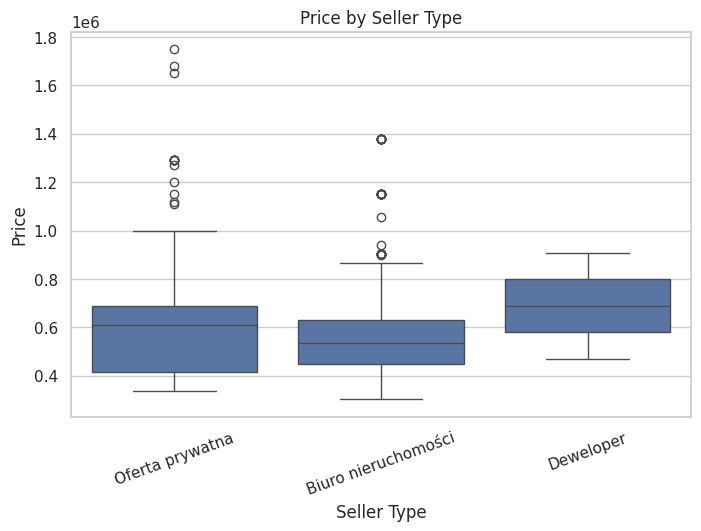

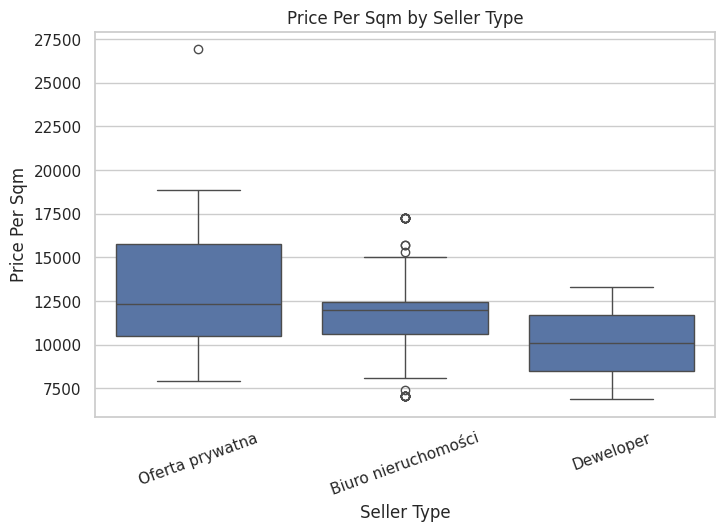

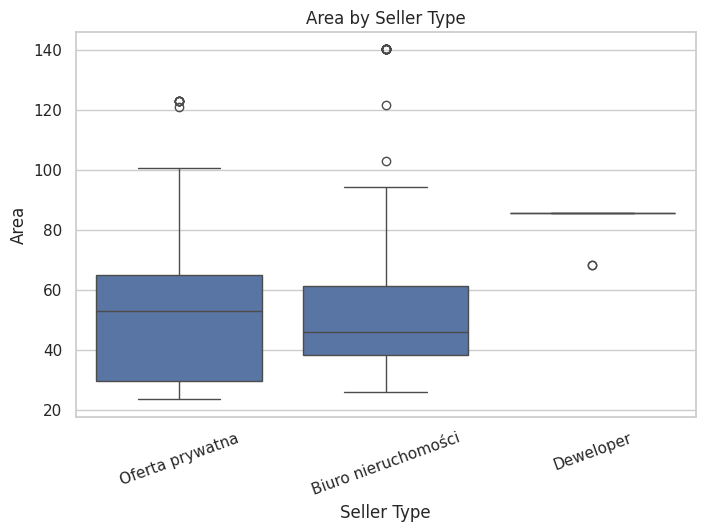

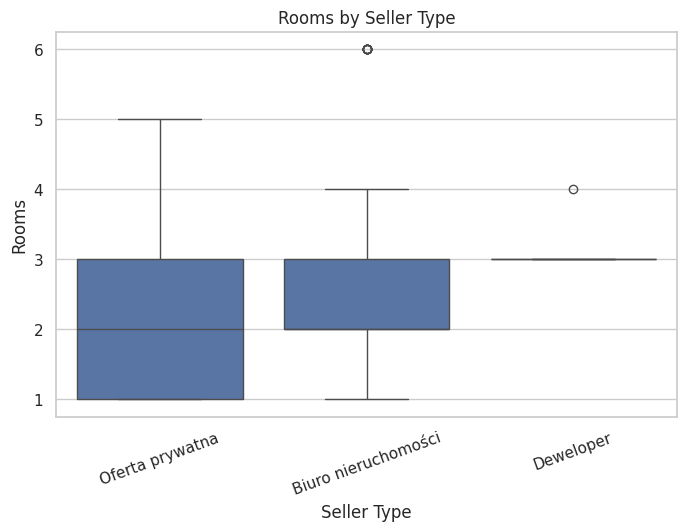

In [53]:
quant_vars = ['price', 'price_per_sqm', 'area', 'rooms']

for var in quant_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='seller_type', y=var, data=df_clean)
    plt.title(f'{var.replace("_", " ").title()} by Seller Type')
    plt.ylabel(var.replace("_", " ").title())
    plt.xlabel('Seller Type')
    plt.xticks(rotation=20)
    plt.show()

# Overall Insights

## Price
- Very small count for Deweloper listings, as the prices were mostly unavailable in the data for those
- Median prices: Agencies ~534 k PLN, Private ~610 k PLN, Developers ~688 k PLN (small n).
- Skewness: Right-skewed for Agencies (1.82) and Private (1.78), few extreme high-value listings.
- Kurtosis: Heavy tails in Agencies (3.62) and Private (3.98).

## Price per m²
- Median: Agencies ~11,981 PLN/m², Private ~12,356 PLN/m².
- Developers: very few observations; median ~10,092 PLN/m² but unreliable.
- Skewness: Mostly symmetric for Agencies (~0), slight right skew in Private (~0.86).

## Rooms
- Median: 2–3 rooms across groups.
- Skewness: Moderate positive skew (Agencies 0.77, Private 0.53).
- Developers: too few to infer meaningful patterns.

## Area
- Median: Agencies 46 m², Private 53 m².
- Skewness: High in Agencies (2.11), moderate in Private (0.92), reflecting presence of larger apartments.
- Developers: very small sample; statistics not representative.


In [44]:
# by district
quant_cols = ['price','price_per_sqm', 'rooms', 'area']
district_stats = {}

for col in quant_cols:
    grouped = df_clean.groupby('district')[col]
    desc = grouped.agg(['count', 'median', 'std', 'min', 'max'])
    desc['q1'] = grouped.quantile(0.25)
    desc['q3'] = grouped.quantile(0.75)
    desc['iqr'] = desc['q3'] - desc['q1']
    desc['range'] = desc['max'] - desc['min']
    desc['skewness'] = grouped.apply(lambda x: skew(x, bias=False))
    desc['kurtosis'] = grouped.apply(lambda x: kurtosis(x, bias=False))
    desc = desc.round(2)
    district_stats[col] = desc

# Display all summaries neatly
for col, table in district_stats.items():
    print(f"\n=== {col.upper()} by District ===")
    display(table)



=== PRICE by District ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
district,,,,,,,,,,,
Grunwald,170,620000.0,339700.57,325000.0,1668594.0,491700.0,901357.38,409657.38,1343594.0,1.13,1.04
Jeżyce,222,569900.0,195690.90,405103.0,1680000.0,499000.0,719000.00,220000.00,1274897.0,2.15,6.64
Nowe Miasto,104,499000.0,296350.55,435764.0,1750000.0,450112.0,589000.00,138888.00,1314236.0,2.27,3.97
Stare Miasto,175,550000.0,141262.43,303100.0,999000.0,425000.0,650000.00,225000.00,695900.0,0.60,0.21
Wilda,51,429000.0,168015.67,370000.0,1119000.0,370000.0,619000.00,249000.00,749000.0,1.77,3.94



=== PRICE_PER_SQM by District ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
district,,,,,,,,,,,
Grunwald,170,11063.04,3175.51,7064.00,18900.00,9554.35,13518.52,3964.17,11836.00,0.84,0.22
Jeżyce,222,12192.44,1090.68,9324.32,17373.32,11318.99,12405.41,1086.42,8049.00,0.43,3.65
Nowe Miasto,104,10467.72,2619.03,6883.90,17397.36,10183.67,12394.07,2210.40,10513.46,0.87,0.45
Stare Miasto,175,12700.00,2834.80,7396.74,26919.97,11298.61,14554.79,3256.18,19523.23,0.99,2.37
Wilda,51,12380.00,2503.29,9533.33,18650.00,12380.00,15744.68,3364.68,9116.67,-0.07,-1.10



=== ROOMS by District ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
district,,,,,,,,,,,
Grunwald,170,3.0,1.32,1.0,6.0,2.0,3.0,1.0,5.0,0.54,0.12
Jeżyce,222,2.0,0.85,1.0,5.0,2.0,3.0,1.0,4.0,0.95,0.77
Nowe Miasto,104,3.0,0.68,2.0,5.0,2.0,3.0,1.0,3.0,0.45,-0.06
Stare Miasto,175,2.0,0.93,1.0,4.0,1.0,3.0,2.0,3.0,0.53,-0.58
Wilda,51,3.0,0.95,1.0,3.0,1.0,3.0,2.0,2.0,-0.37,-1.84



=== AREA by District ===


,count,median,std,min,max,q1,q3,iqr,range,skewness,kurtosis
district,,,,,,,,,,,
Grunwald,170,55.20,34.29,26.01,140.19,41.20,89.99,48.79,114.18,0.82,-0.12
Jeżyce,222,46.00,18.85,30.09,123.00,41.00,68.70,27.70,92.91,1.57,3.27
Nowe Miasto,104,48.00,12.33,38.09,100.59,47.20,53.68,6.48,62.50,1.90,3.26
Stare Miasto,175,39.75,15.47,27.29,121.54,29.45,53.00,23.55,94.25,1.17,2.51
Wilda,51,45.00,13.86,23.50,81.25,23.50,50.00,26.50,57.75,0.21,-0.26


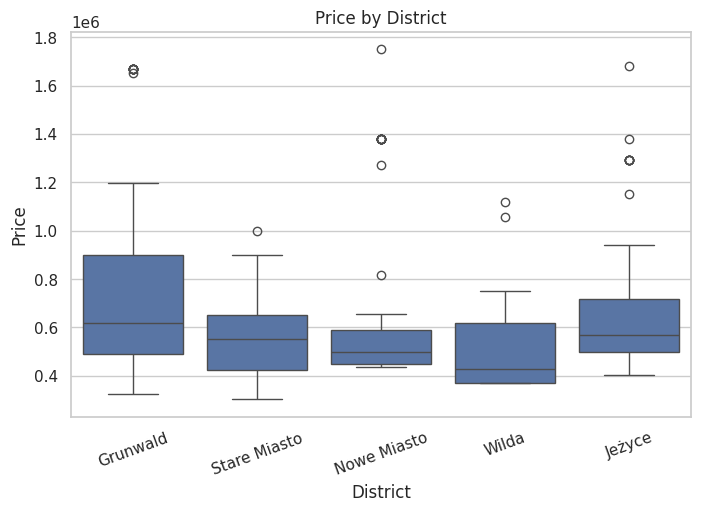

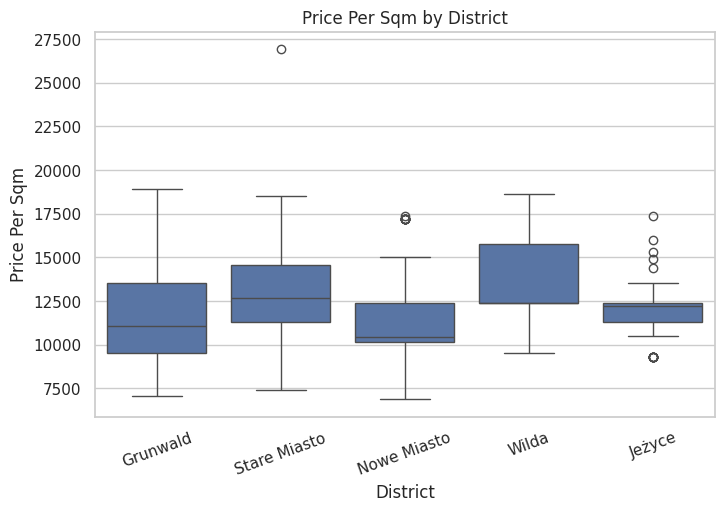

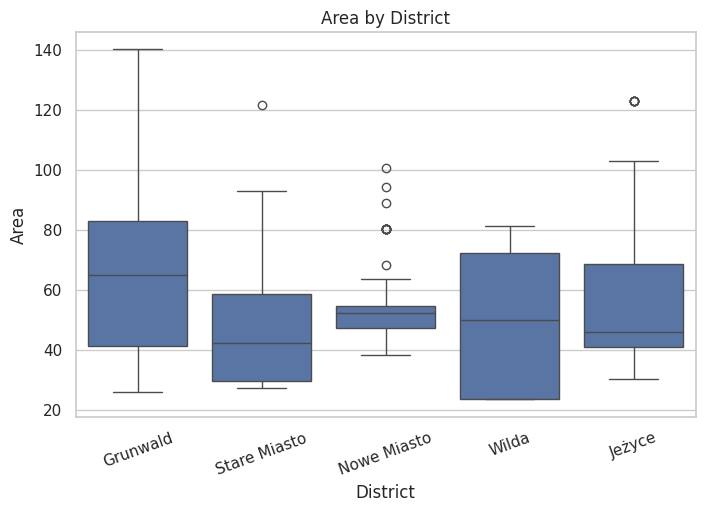

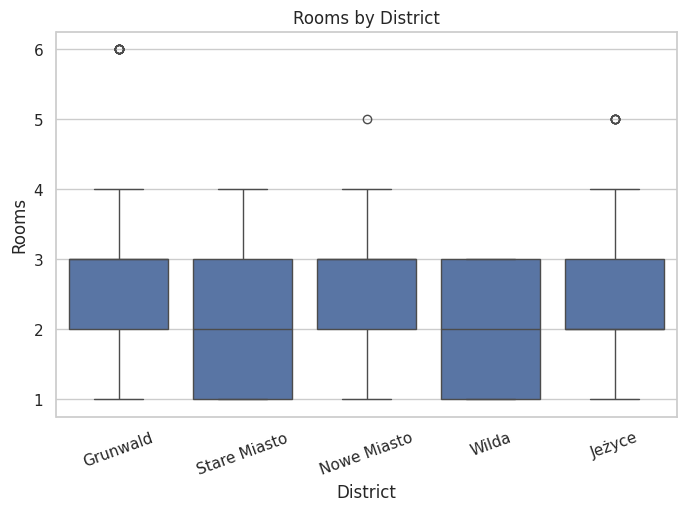

In [52]:
quant_vars = ['price', 'price_per_sqm', 'area', 'rooms']
for var in quant_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='district', y=var, data=df_clean)
    plt.title(f'{var.replace("_", " ").title()} by District')
    plt.ylabel(var.replace("_", " ").title())
    plt.xlabel('District')
    plt.xticks(rotation=20)
    plt.show()

# Overall Insights

## Price
- Median prices vary from ~429 k PLN (Wilda) to ~620 k PLN (Grunwald).
- Right-skewed in all districts (skewness 0.6–2.27), with Jeżyce and Nowe Miasto showing strongest skew.
- Kurtosis indicates heavy tails in central districts (Jeżyce 6.64, Nowe Miasto 3.97).

## Price per m²
- Median ranges: 10,467 PLN/m² (Nowe Miasto) to 12,700 PLN/m² (Stare Miasto)
- Skewness mostly moderate (<1), except Stare Miasto (0.99).

## Rooms
- Median: 2–3 rooms across districts.
- Skewness small to moderate; Wilda slightly negative (-0.37).

## Area
- Median: 39.75 m² (Stare Miasto) to 55.20 m² (Grunwald).
- Skewness: Highest in Nowe Miasto (1.90) and Jeżyce (1.57).
- Developers: very small sample; statistics not representative.

## Dispersion
- IQR and range highlight variability, especially in central districts with high-value or large units.
- Outliers affect mean > median difference, as seen in price distributions.

## Seller type by district

In [31]:
seller_type_stats = df_clean.groupby(['district', 'seller_type']).size().unstack(fill_value=0)

# normalize the counts to get percentages
seller_type_stats = seller_type_stats.div(seller_type_stats.sum(axis=1), axis=0) * 100
seller_type_stats = seller_type_stats.round(2)
seller_type_stats = seller_type_stats.fillna(0)
seller_type_stats



seller_type,Biuro nieruchomości,Deweloper,Oferta prywatna
district,,,
Grunwald,61.49,0.68,37.84
Jeżyce,89.59,0.00,10.41
Nowe Miasto,93.14,0.98,5.88
Stare Miasto,64.94,0.00,35.06
Wilda,50.98,0.00,49.02


## Insights
- Grunwald: Most properties are listed by real estate agencies (61.49%), a smaller portion are private offers (37.84%), and very few by developers (0.68%).
- Jeżyce and Nowe Miasto: Dominated by real estate agencies (89.59% and 93.14%, respectively) with very few private offers and almost no developer listings.
- Stare Miasto: A more balanced mix, with 57.80% through agencies, 31.21% private, and a notable 10.98% from developers.
- Wilda: Almost half of listings are private (49.02%) and the rest primarily through agencies (50.98%), with no developer listings.

Overall, central and popular districts like Jeżyce and Nowe Miasto rely heavily on agencies, while peripheral or mixed districts like Wilda and Stare Miasto show a stronger presence of private offers and, in some cases, developers.

## Seller type distribution - visualization

<Figure size 1200x600 with 0 Axes>

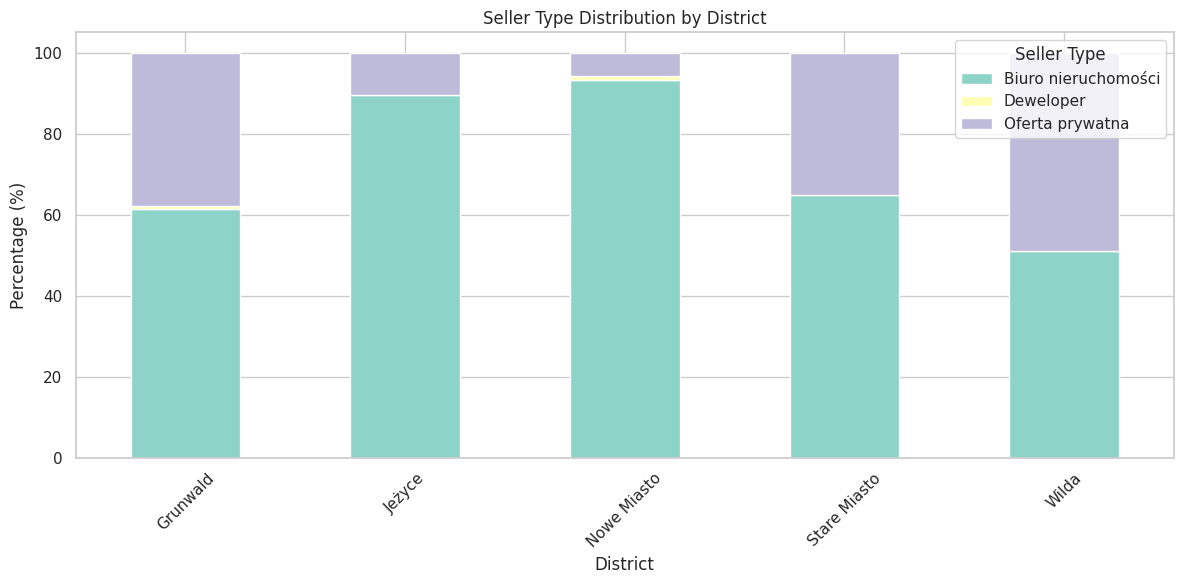

In [34]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set3") 
seller_type_stats.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(12, 6)
)
plt.title('Seller Type Distribution by District')
plt.xlabel('District')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Seller Type')
plt.tight_layout()
plt.show()